In [8]:
a = 12000
n = 0
while a >= 0:
    a = (1 + 0.199/12)*a - 610.164
    n += 1
    print(n, a)

1 11588.836
2 11170.853530333332
3 10745.939518044694
4 10313.979015052268
5 9874.855167051885
6 9428.449181905495
7 8974.640297505428
8 8513.305749105726
9 8044.32073611173
10 7567.558388318917
11 7082.889731591874
12 6590.183652974107
13 6089.306865219261
14 5580.123870734148
15 5062.496924923823
16 4536.28599892881
17 4001.3487417443803
18 3457.5404417116415
19 2904.713987370026
20 2342.7198276605795
21 1771.4059314692843
22 1190.6177464994832
23 600.1981574622664
24 -0.01255642648425237


In [5]:
1 + 0.199/12

1.0165833333333334

In [9]:
a = 12000
n = 0
while a >= 0:
    a = (1 + 0.199/12) * (a + 105) - 716.905
    n += 1
    print(n, a)

1 11588.83625
2 11170.854034479167
3 10745.940280550947
4 10313.980040203416
5 9874.856459203456
6 9428.450745485246
7 8974.642137014544
8 8513.307869120035
9 8044.323141282944
10 7567.5610833758865
11 7082.892721341871
12 6590.186942304124
13 6089.310459097335
14 5580.1277742107
15 5062.501143133029
16 4536.290537089985
17 4001.3536051633946
18 3457.545635782355
19 2904.719517575746
20 2342.7256995755442
21 1771.4121507601724
22 1190.6243189269453
23 600.205088882484
24 -0.005260060214709483


In [36]:
import pandas as pd

pop = pd.read_csv('population.txt', header = None, names = ['population'])
pop = pop.reset_index()

In [303]:
>>> import seaborn as sns
>>> import matplotlib.pyplot as plt

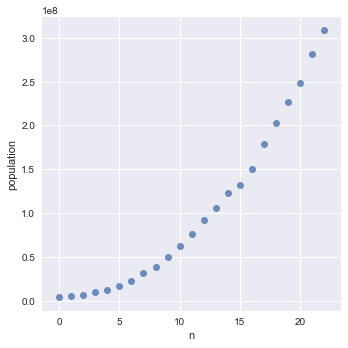

In [58]:
sns.lmplot(x='index', y='population', data=pop, ci=None, fit_reg=False)
plt.xlabel('n');

In [71]:
pop['delta p'] = pop['population'].shift(-1) - pop['population']
pop['delta p'] = pop['delta p'].fillna(0).astype(int)
pop.head()

,index,population,delta p
0,0,3929000,1379000
1,1,5308000,1932000
2,2,7240000,2398000
3,3,9638000,3228000
4,4,12866000,4203000


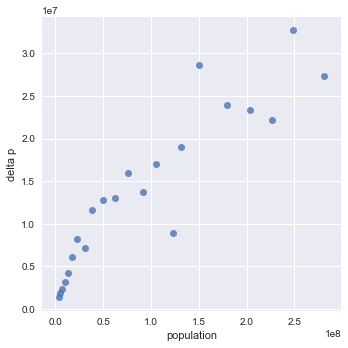

In [105]:
sns.lmplot(x='population', y='delta p', data=pop.iloc[:-1,:], ci=None, fit_reg=False);

In [83]:
pop.tail()

,index,population,delta p
18,18,203212000,23293000
19,19,226505000,22205000
20,20,248710000,32706000
21,21,281416000,27330000
22,22,308746000,0


In [229]:
c = 4*10**8

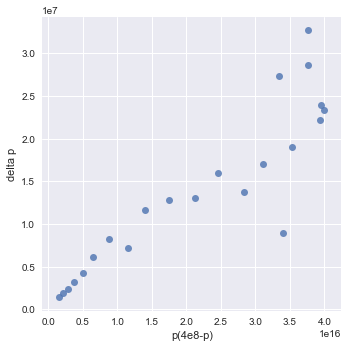

In [237]:
pop['(c-p)p'] = (c - pop['population']) * pop['population']
sns.lmplot(x='(c-p)p', y='delta p', data=pop.iloc[:-1,:], ci=None, fit_reg=False)
plt.xlabel('p(4e8-p)');

In [238]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=False).fit(pop['(c-p)p'].ravel().reshape(-1,1), pop['delta p'])

In [239]:
lm.coef_

array([5.91446003e-10])

In [233]:
pop['k(c-p)p'] = lm.coef_[0] * pop['(c-p)p']

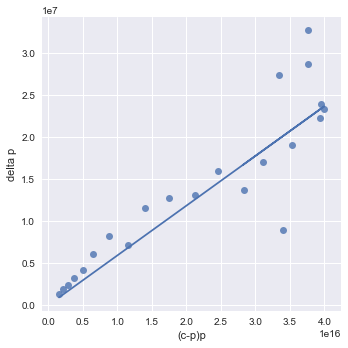

In [234]:
sns.lmplot(x='(c-p)p', y='delta p', data=pop.iloc[:-1,:], ci=None, fit_reg=False);
#plt.plot(np.linspace(0, 2.5*10**7, 100))
plt.plot(pop['(c-p)p'], pop['k(c-p)p'])

In [235]:
import numpy as np
pred = np.zeros(pop.shape[0])
p0 = pop['population'][0]
pred[0] = p0
for i in range(1,len(pred)):
    pred[i] = p0 + lm.coef_[0]*(c-p0)*p0
    p0 = pred[i]
pop['pred'] = pd.Series(pred).values

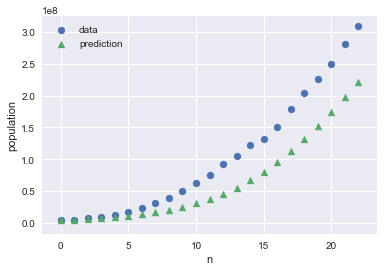

In [241]:
# sns.lmplot(x='index', y='population', data=pop, ci=None, fit_reg=False)
# sns.lmplot(x='index', y='pred', data=pop, ci=None, fit_reg=False)

plt.scatter(pop['index'], pop['population'], marker='o', label='data')
plt.scatter(pop['index'], pop['pred'], marker='^', label='prediction')
plt.legend(loc='upper left')
plt.xlabel('n')
plt.ylabel('population')
plt.show()

# fig, axs = plt.subplots(ncols=2)
# sns.regplot(x='index', y='population', data=pop, ax=axs[0])
# sns.regplot(x='index', y='pred', data=pop, ax=axs[1])

In [256]:
brake = pd.read_csv('brake.txt', header = None, names = ['distance'])
brake = brake.reset_index()
brake['index'] = brake['index'].shift(-1).fillna(brake.shape[0]).astype(int)

In [259]:
brake.head()

,index,distance
0,1,3
1,2,6
2,3,11
3,4,21
4,5,32


In [260]:
brake['delta a'] = brake['distance'].shift(-1) - brake['distance']

In [261]:
brake

,index,distance,delta a
0,1,3,3.0
1,2,6,5.0
2,3,11,10.0
3,4,21,11.0
4,5,32,15.0
5,6,47,18.0
6,7,65,22.0
7,8,87,25.0
8,9,112,28.0
9,10,140,31.0


Text(0.5,8.96,'n')

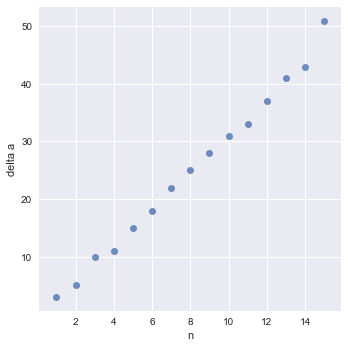

In [266]:
sns.lmplot(x='index', y='delta a', data=brake.iloc[:-1,:], ci=None, fit_reg=False)
plt.xlabel('n')

In [283]:
brake_lm = LinearRegression(fit_intercept=False).fit(brake['index'][:-1].ravel().reshape(-1,1), brake['delta a'][:-1])
brake_lm.coef_

array([3.13951613])

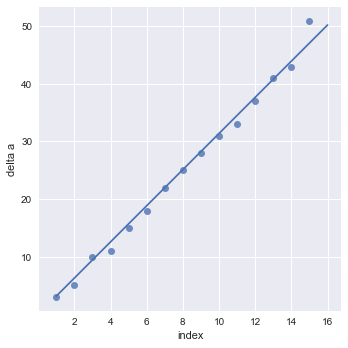

In [284]:
sns.lmplot(x='index', y='delta a', data=brake.iloc[:-1,:], ci=None, fit_reg=False);
#plt.plot(np.linspace(0, 2.5*10**7, 100))
plt.plot(brake['index'], brake_lm.coef_[0]*brake['index'])

In [287]:
import numpy as np
pred = np.zeros(brake.shape[0])
a0 = brake['distance'][0]
pred[0] = a0
for i in range(1,len(pred)):
    pred[i] = a0 + brake_lm.coef_[0]*i
    a0 = pred[i]
brake['pred'] = pd.Series(pred).values

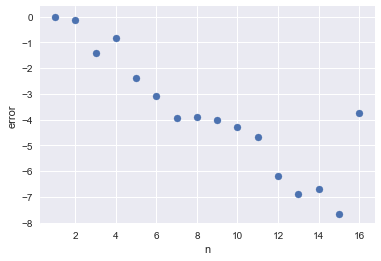

In [311]:
plt.scatter(brake['index'], brake['distance']-brake['pred'], marker='o')
plt.xlabel('n')
plt.ylabel('error')
plt.show()

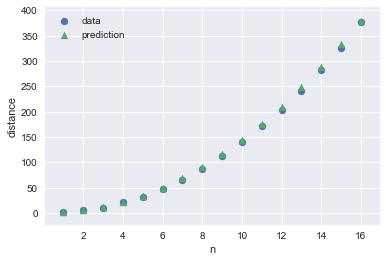

In [312]:
plt.scatter(brake['index'], brake['distance'], marker='o', label='data')
plt.scatter(brake['index'], brake['pred'], marker='^', label='prediction')
plt.legend(loc='upper left')
plt.xlabel('n')
plt.ylabel('distance')
plt.show()